In [11]:
import numpy as np
import pandas as pd
import pyro.distributions as dist
from scipy.stats import beta, pareto
import scipy.stats as stats


import torch
import seaborn as sns

import matplotlib.pyplot as plt

from utils.BoundedPareto import BoundedPareto

In [2]:
def get_a_beta(phi, kappa):
    return phi * kappa
def get_b_beta(phi, kappa):
    return (1-phi) * (kappa)

def beta_lk(data, phi,kappa):
    """
    Compute log probabilities of beta for a single dimension of a single cluster.
    """
    a_beta = get_a_beta(phi,kappa)
    b_beta = get_b_beta(phi,kappa)
    beta = dist.Beta(a_beta, b_beta).log_prob(data)
    return beta

def pareto_lk(data, alpha, pareto_L, pareto_H):
    """
    Compute log probabilities of pareto for a single dimension of a single cluster.
    """
    pareto = BoundedPareto(pareto_L, alpha, pareto_H).log_prob(data)
    return pareto

In [3]:
start = 0.011
end = 0.5
step = 0.001
vaf_range = torch.arange(start, end, step)
phi_1 = 0.3
kappa_1 = 200.
phi_2 = 0.1
kappa_2 = 50
alpha = 1.
pareto_L = 0.01
pareto_H = 0.51
pareto_l = []
beta_1 = []
beta_2 = []
for i in vaf_range:
    pareto_l.append(pareto_lk(i, alpha, pareto_L, pareto_H))
    beta_1.append(beta_lk(i, phi_1, kappa_1))
    beta_2.append(beta_lk(i, phi_2, kappa_2))


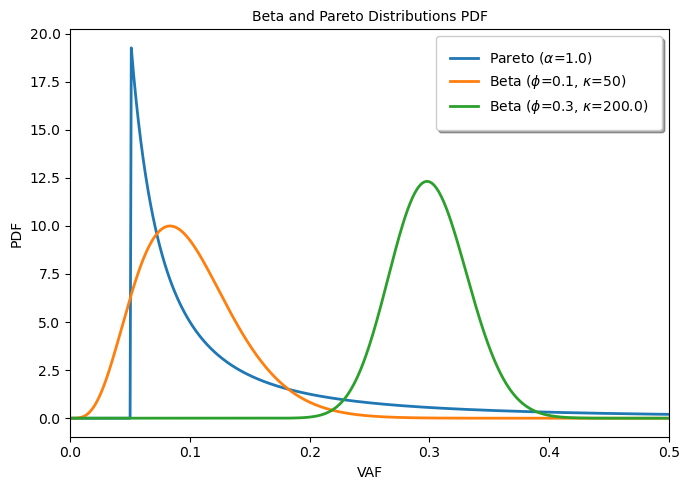

In [4]:
x = np.linspace(0.001, 0.999, 1000)

pdf_p = pareto.pdf(x, alpha, scale=0.05)

# First Beta distribution parameters
a_beta_1 = get_a_beta(phi_1, kappa_1)
b_beta_1 = get_b_beta(phi_1, kappa_1)
pdf_1 = beta.pdf(x, a_beta_1, b_beta_1)

# Second Beta distribution parameters
a_beta_2 = get_a_beta(phi_2, kappa_2)
b_beta_2 = get_b_beta(phi_2, kappa_2)
pdf_2 = beta.pdf(x, a_beta_2, b_beta_2)

pdf_3 = beta.pdf(x, get_a_beta(0.1, 35), get_b_beta(0.1, 35))
pdf_4 = beta.pdf(x, get_a_beta(0.01, 85), get_b_beta(0.01, 85))

plt.figure(figsize=(7, 5))
plt.plot(x, pdf_p, label=f'Pareto ($\\alpha$={alpha})', linewidth=2)
plt.plot(x, pdf_2, label=f'Beta ($\\phi$={phi_2}, $\\kappa$={kappa_2})', linewidth=2)
plt.plot(x, pdf_1, label=f'Beta ($\\phi$={phi_1}, $\\kappa$={kappa_1})', linewidth=2)
# plt.plot(x, pdf_3, label=f'Beta ($\\phi$={0.08}, $\\kappa$={15})', linewidth=1.5)
# plt.plot(x, pdf_4, label=f'Beta ($\\phi$={0.05}, $\\kappa$={80})', linewidth=1.5)

plt.xlabel('VAF', fontsize=10)
plt.ylabel('PDF', fontsize=10)
plt.title('Beta and Pareto Distributions PDF', fontsize=10)
plt.legend(loc='best',fontsize=10, frameon=True, shadow=True, borderpad=1)
plt.xlim([0,0.5])

# plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

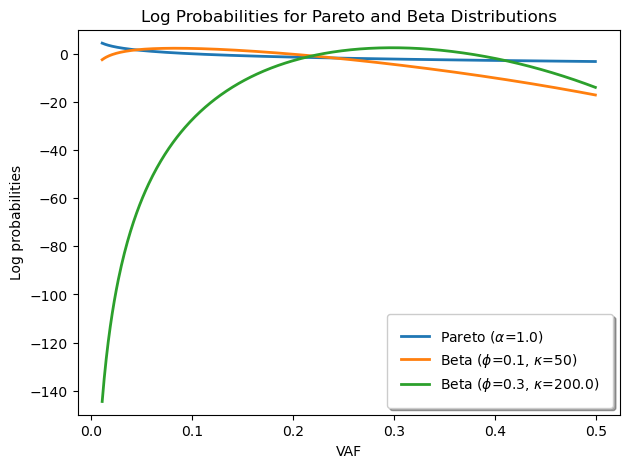

In [5]:
plt.figure(figsize=(7, 5))
plt.plot(vaf_range, pareto_l, label=f'Pareto ($\\alpha$={alpha})', linestyle='-', linewidth=2)
plt.plot(vaf_range, beta_2, label=f'Beta ($\\phi$={phi_2}, $\\kappa$={kappa_2})', linestyle='-', linewidth=2)
plt.plot(vaf_range, beta_1, label=f'Beta ($\\phi$={phi_1}, $\\kappa$={kappa_1})', linestyle='-', linewidth=2)

plt.xlabel('VAF')
plt.ylabel('Log probabilities')
plt.title('Log Probabilities for Pareto and Beta Distributions')
plt.legend(loc ='best',fontsize=10, frameon=True, shadow=True, borderpad=1)
# plt.grid()
plt.ylim([-150,10])

plt.show()

In [10]:
for i in range(len(vaf_range)):
    if (pareto_l[i-1] > beta_2[i-1]) and (pareto_l[i] <beta_2[i]):
        print(vaf_range[i])


tensor(0.0450)


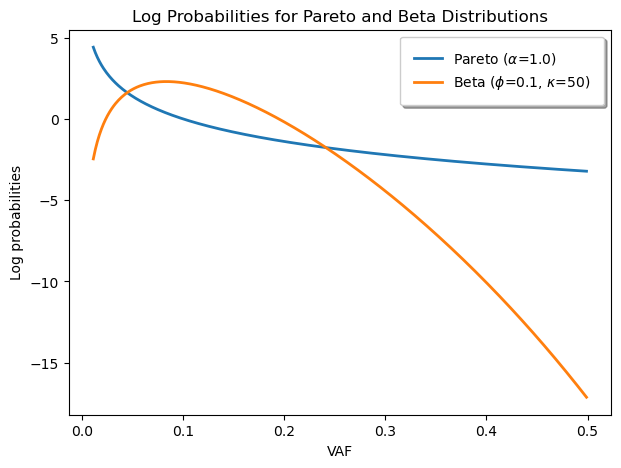

In [8]:
plt.figure(figsize=(7, 5))
plt.plot(vaf_range, pareto_l, label=f'Pareto ($\\alpha$={alpha})', linestyle='-', linewidth=2)
# plt.plot(vaf_range, beta_1, label='Beta (phi=0.4, kappa=200)', linestyle='-', linewidth=1.3)
plt.plot(vaf_range, beta_2, label=f'Beta ($\\phi$={phi_2}, $\\kappa$={kappa_2})', linestyle='-', linewidth=2)
# plt.axvline(x=0.04, color='black', linestyle='--', linewidth=1.)
# plt.axvline(x=0.22, color='black', linestyle='--', linewidth=1.)
# plt.vlines(x=0.03, ymin=plt.ylim()[0], ymax=0, color='black', linewidth=1.5)


plt.xlabel('VAF')
plt.ylabel('Log probabilities')
plt.title('Log Probabilities for Pareto and Beta Distributions')
plt.legend(loc ='best', fontsize=10, frameon=True, shadow=True, borderpad=1)

plt.show()

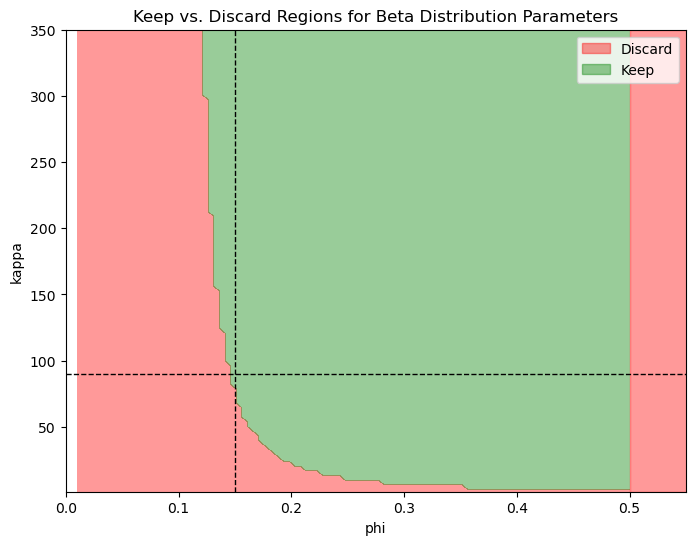

In [270]:
# At the moment we are only considering the decile to create the grid
def beta_quantiles(phi, kappa):
    """
    Calculate the 10th and 90th percentiles for the Beta distribution given phi and kappa.
    """
    a = get_a_beta(phi, kappa)
    b = get_b_beta(phi, kappa)
    
    # Calculate the 10th and 90th percentiles for the Beta distribution
    decile = stats.beta.ppf(0.1, a, b)
    quantile_90 = stats.beta.ppf(0.9, a, b)
    return decile, quantile_90

# Range of phi and kappa
phi_values = np.linspace(0.01, 0.5, 100)
kappa_values = np.linspace(1, 350, 100)

# Thresholds for the decile and 90th percentile
decile_threshold = 0.1
quantile_90_threshold = 0.5

# Create a grid for phi and kappa
phi_grid, kappa_grid = np.meshgrid(phi_values, kappa_values)
adapted_grid = np.zeros_like(phi_grid, dtype=int)

# Loop over the grid and check conditions for each pair of phi and kappa
for i in range(len(kappa_values)):
    for j in range(len(phi_values)):
        phi = phi_grid[i, j]
        kappa = kappa_grid[i, j]
        # Calculate the 10th and 90th percentiles for the Beta distribution
        decile, quantile_90 = beta_quantiles(phi, kappa)
        
        # Check if the decile is adapted or not
        if decile > decile_threshold:
            adapted_grid[i, j] = 1  # Mark as "keep"

plt.figure(figsize=(8, 6))
contour = plt.contourf(phi_grid, kappa_grid, adapted_grid, levels=[-0.5, 0.5, 1.5], colors=['red', 'green'], alpha=0.4) # for a continuous effect

# Add a red region for phi > 0.5 as the discard region
plt.axvspan(0.5, 0.6, color='red', alpha=0.4, label='Discard Region (phi > 0.5)')

plt.xlabel('phi')
plt.ylabel('kappa')
plt.xlim([0, 0.55])
plt.title('Keep vs. Discard Regions for Beta Distribution Parameters')

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Discard', alpha=0.4)
green_patch = mpatches.Patch(color='green', label='Keep', alpha=0.4)
plt.legend(handles=[red_patch, green_patch], loc='upper right')

# vertical and horizontal lines (region boundaries)
plt.axvline(x=0.15, color='black', linestyle='--', linewidth=1., label=r'$\phi = 0.15$')
plt.axhline(y=90, color='black', linestyle='--', linewidth=1., label=r'$\kappa = 90$')

plt.show()

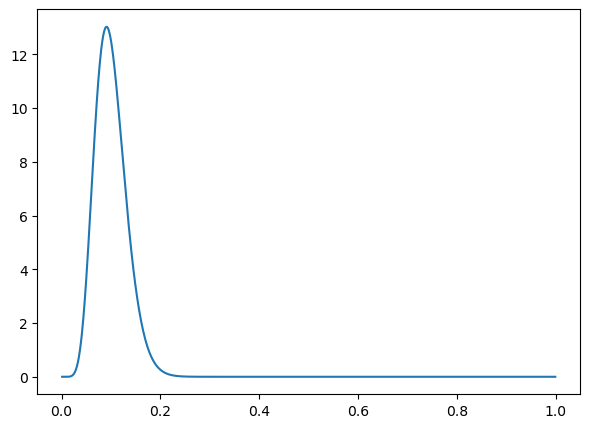

In [18]:
phi = 0.1
kappa = 90
a_beta = get_a_beta(phi, kappa)
b_beta = get_b_beta(phi, kappa)
pdf = beta.pdf(x, a_beta, b_beta)

plt.figure(figsize=(7, 5))
plt.plot(x, pdf, label=f'Pareto ($\\alpha$={alpha})', linewidth=1.5)